#  Census Income Data Classification

# Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d vivamoto/us-adult-income-update

Dataset URL: https://www.kaggle.com/datasets/vivamoto/us-adult-income-update
License(s): U.S. Government Works
 79%|██████████████████████████████▋        | 1.00M/1.27M [00:01<00:00, 685kB/s]
100%|███████████████████████████████████████| 1.27M/1.27M [00:01<00:00, 830kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('//home/bhxveshhh/ML/ Census Income Data Classification/us-adult-income-update.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/ Census Income Data Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('census.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.shape

(48842, 15)

In [7]:
df.size

732630

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(52)

In [13]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                2
dtype: int64

In [14]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

## Data Visualization

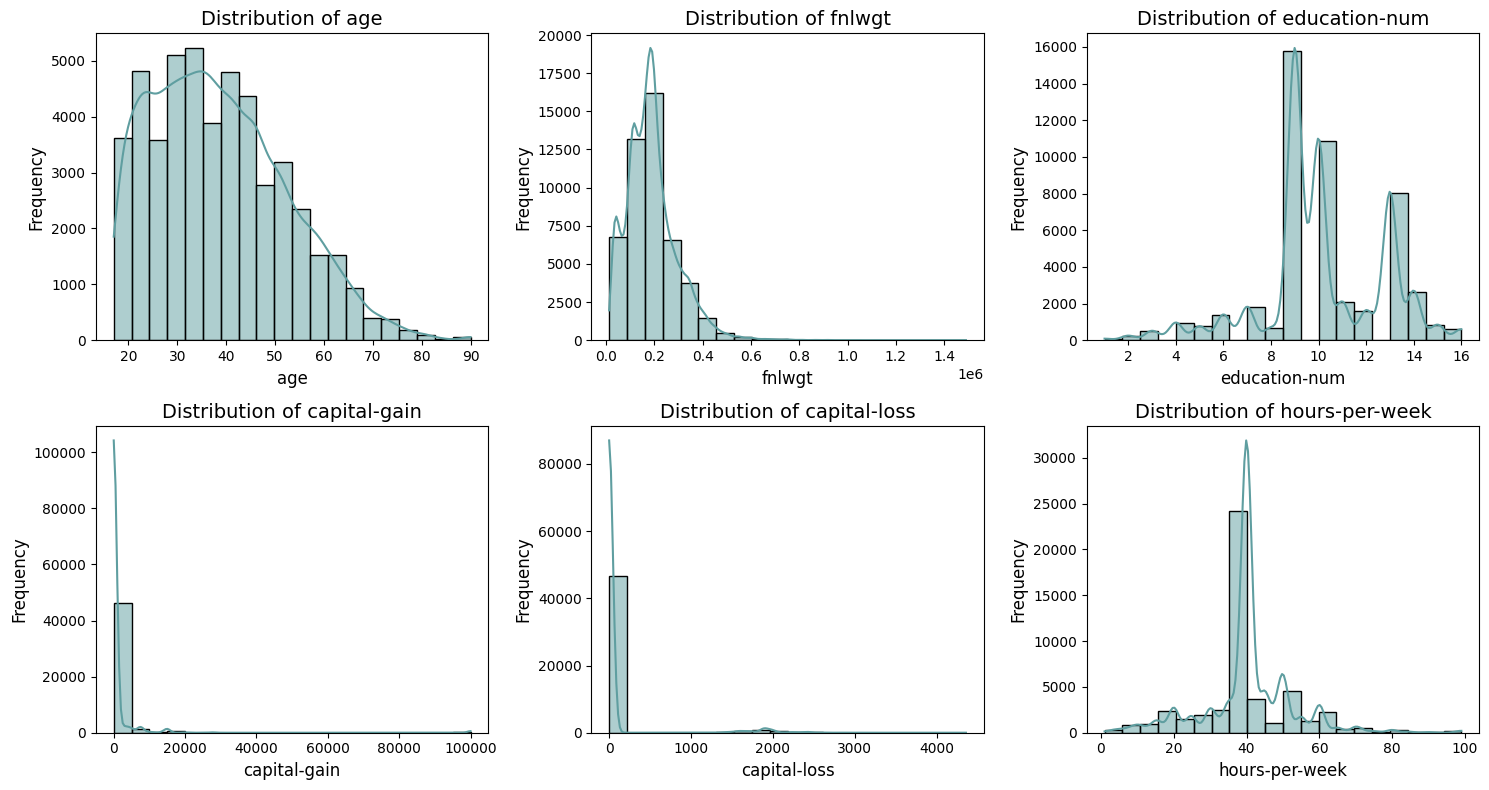

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

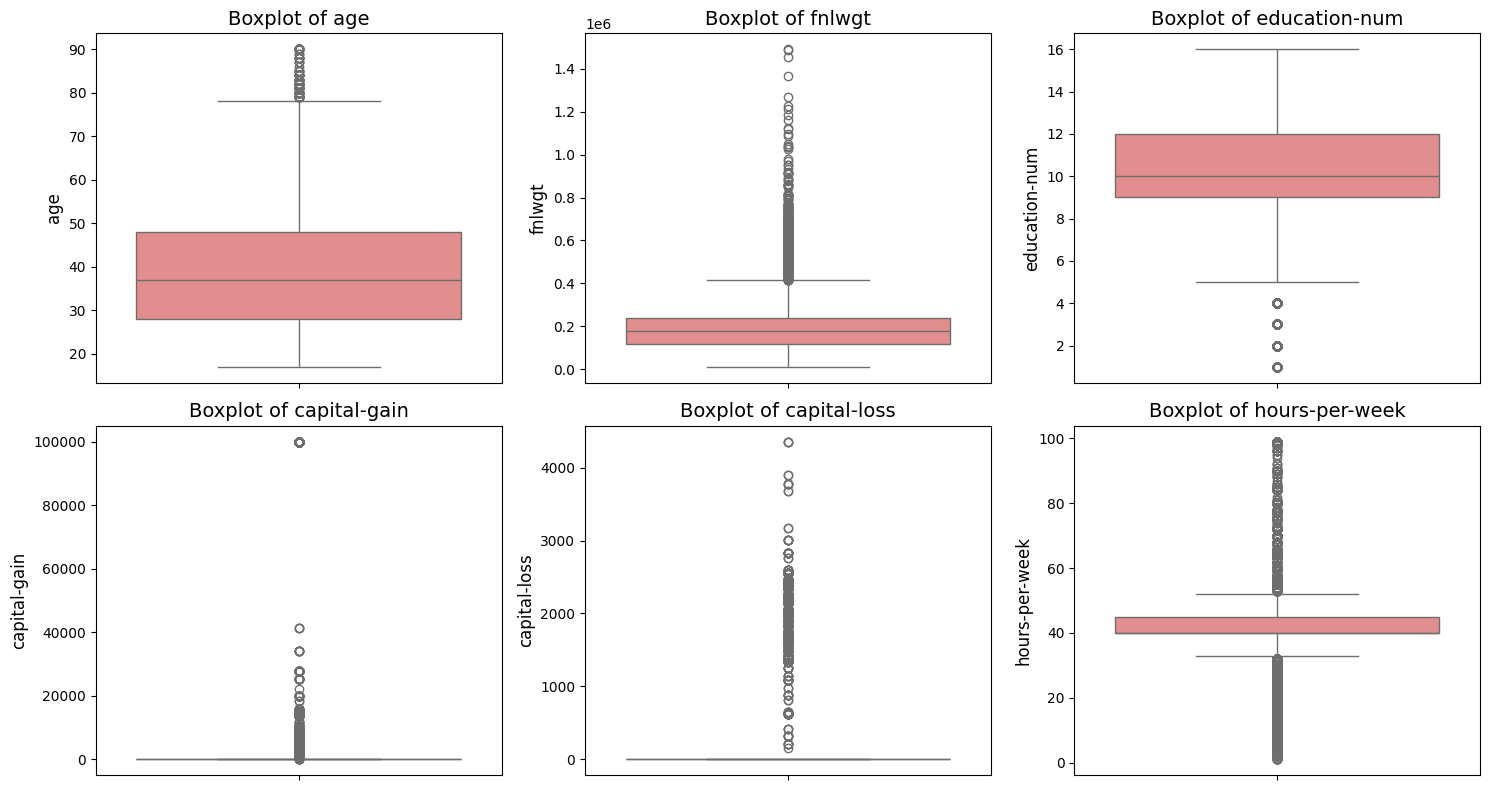

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

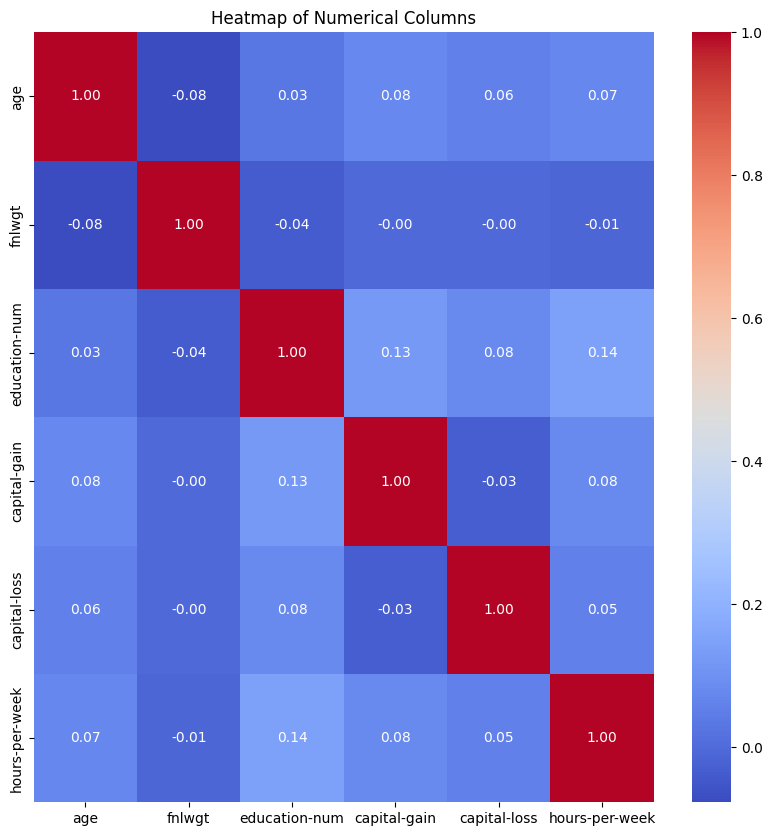

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [18]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [19]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [20]:
X = df.drop('income', axis=1)
y = df['income']

In [21]:
# Applying SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [25]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [26]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [28]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.697992454863918, 0.7712880625168418, 0.9029237402317435, 0.8947722985718135, 0.8395311236863379, 0.8769199676637025, 0.8854756130423067, 0.8606170843438427, 0.5252627324171383]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      7380
           1       0.70      0.69      0.70      7464

    accuracy                           0.70     14844
   macro avg       0.70      0.70      0.70     14844
weighted avg       0.70      0.70      0.70     14844

Confusion Matrix:
 [[5234 2146]
 [2337 5127]]


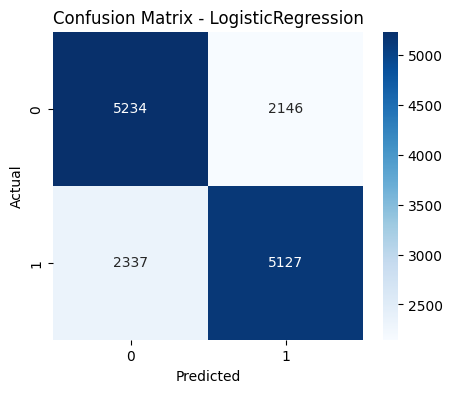

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      7380
           1       0.76      0.79      0.78      7464

    accuracy                           0.77     14844
   macro avg       0.77      0.77      0.77     14844
weighted avg       0.77      0.77      0.77     14844

Confusion Matrix:
 [[5531 1849]
 [1546 5918]]


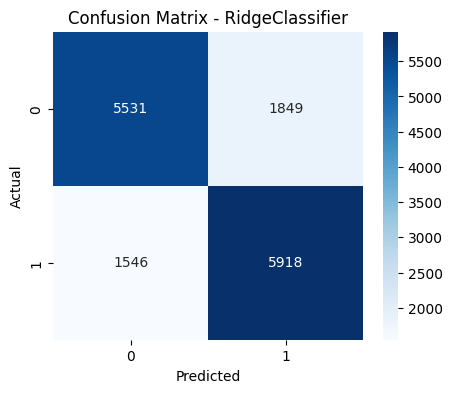

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      7380
           1       0.92      0.89      0.90      7464

    accuracy                           0.90     14844
   macro avg       0.90      0.90      0.90     14844
weighted avg       0.90      0.90      0.90     14844

Confusion Matrix:
 [[6778  602]
 [ 839 6625]]


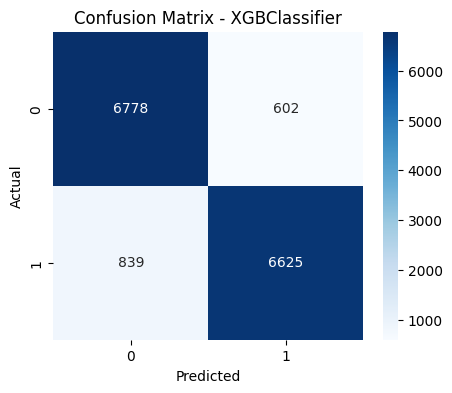

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      7380
           1       0.91      0.89      0.90      7464

    accuracy                           0.90     14844
   macro avg       0.90      0.90      0.90     14844
weighted avg       0.90      0.90      0.90     14844

Confusion Matrix:
 [[6686  694]
 [ 835 6629]]


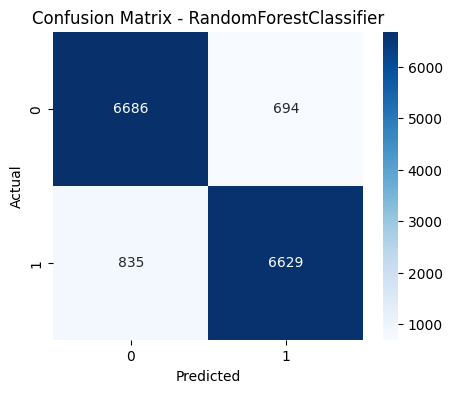

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      7380
           1       0.83      0.85      0.84      7464

    accuracy                           0.84     14844
   macro avg       0.84      0.84      0.84     14844
weighted avg       0.84      0.84      0.84     14844

Confusion Matrix:
 [[6083 1297]
 [1085 6379]]


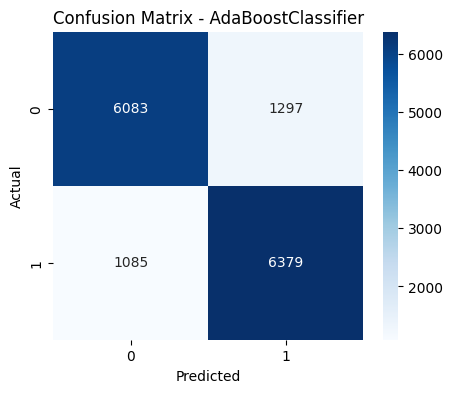

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7380
           1       0.88      0.88      0.88      7464

    accuracy                           0.88     14844
   macro avg       0.88      0.88      0.88     14844
weighted avg       0.88      0.88      0.88     14844

Confusion Matrix:
 [[6462  918]
 [ 909 6555]]


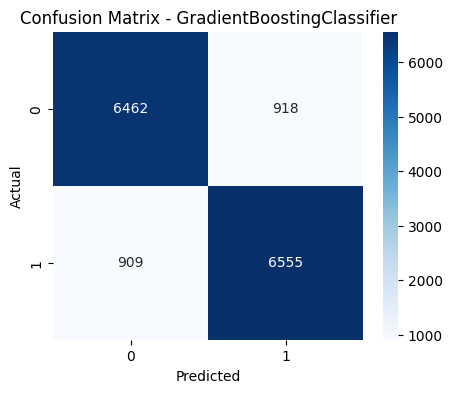

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7380
           1       0.91      0.86      0.88      7464

    accuracy                           0.89     14844
   macro avg       0.89      0.89      0.89     14844
weighted avg       0.89      0.89      0.89     14844

Confusion Matrix:
 [[6731  649]
 [1028 6436]]


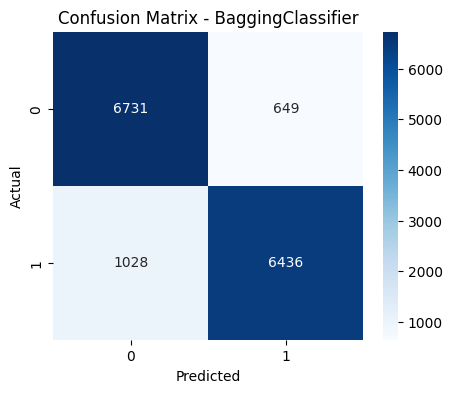

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      7380
           1       0.86      0.86      0.86      7464

    accuracy                           0.86     14844
   macro avg       0.86      0.86      0.86     14844
weighted avg       0.86      0.86      0.86     14844

Confusion Matrix:
 [[6334 1046]
 [1031 6433]]


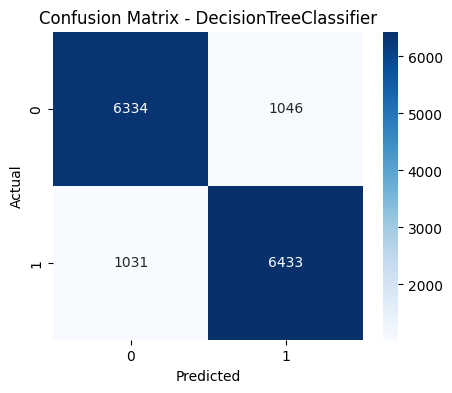

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.62      0.57      7380
           1       0.53      0.43      0.48      7464

    accuracy                           0.53     14844
   macro avg       0.53      0.53      0.52     14844
weighted avg       0.53      0.53      0.52     14844

Confusion Matrix:
 [[4595 2785]
 [4262 3202]]


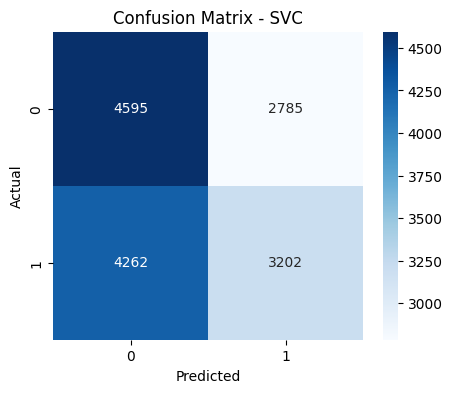

In [29]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()